# Lab 9 - Numerical Integration
## April 17 - April 19, 2023
## Student 1 Name: Dhruv Shah Student 1 ID No. $\underline{202103017}$
## Student 2 Name: Pranav Patel Student 2 ID No. $\underline{202103040}$
## Student 3 Name: Vatsal Shah Student 3 ID No. $\underline{202103022}$
## Date of Submission: $\underline{19/04/23}$
***

In [2]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.special import roots_legendre
from scipy import integrate

### Q.1 Write a function `mytrapezoid` that takes in a function handle $f$, limits of the integral, $a$ and $b$, and the number of points $n$, where the function is to be sampled, and outputs the estimate of $I(f) = \int_a^b f(x)\ dx$ computed via the trapezoid rule. Use equi-distant $n$ samples between $a$ and $b$. These can be computed using `np.linspace`.

In [3]:
### Numerical Integration by Trapezoid rule
def mytrapezoid(f,a,b,n):
   points = np.linspace(a, b, n)
   fpoints = f(points)
 
   h = (b-a)/(n-1)
   
   sumterm = np.sum([fpoints[1:n-1]])
   
   return 1/2 * h * (f(a) + f(b) + (2* sumterm))

In [4]:
# Testing Trapeziod Rule for some functions.
def f(x):
  return x
def f1(x):
  return np.cos(x)
def f2(x):
  return np.exp(x)
def f3(x):
    return 1/x

print(mytrapezoid(f, 0, 2, 20))
print(mytrapezoid(f1, -np.pi,  np.pi, 25))
print(mytrapezoid(f2, 0, 1, 30))
print(mytrapezoid(f3,1,0.25,5))


2.0
5.813114163347719e-16
1.7184520868594677
-1.4280906593406593


***
### Q.2 Write a function `mysimpson` that takes in a function handle $f$, limits of the integral, $a$ and $b$, and the number of points $n$, where the function is to be sampled, and outputs the estimate of $I(f) = \int_a^b f(x)\ dx$ computed via the Simpson's rule.

In [5]:
### Numerical Integration by Simpson's rule. Note that in case 'n' is not odd, 
### you can use 'n+1' points.

def mysimpson(f,a,b,n):
    if(n%2!=0):
        points  = np.linspace(a,b,n)
        h = (b-a)/(n-1)  
    else:
        points  = np.linspace(a,b,n+1)
        h = (b-a)/(n) 
    y = f(points)  
    I = (h/3) * (y[0]+y[n-1]+2*np.sum(y[2:n-2:2])+4*np.sum(y[1:n-1:2]))
    return I

In [6]:
# Testing the Simpson's Rule for some functions
def f(x):
  return x
def f1(x):
  return np.cos(x)
def f2(x):
  return np.exp(x)
def f3(x):
    return 1/x

print(mysimpson(f, 0, 2, 20))
print(mysimpson(f1, -np.pi,  np.pi, 25))
print(mysimpson(f2, 0, 1, 30))
print(mysimpson(f3,1,0.25,5))

1.6233333333333333
6.588196051794082e-16
1.543929362970743
-1.391620879120879


***
### Q.3 Write a function `myGaussianint` that takes in a function handle $f$, limits of the integral, $a$ and $b$, and the number of points $n$, where the function is to be sampled, and outputs the estimate of $I(f) = \int_a^b f(x)\ dx$ computed via the Gaussian Numerical Integration rule. The points $x_i,i=1,\ldots,n$ and weights $w_i,i=1,\ldots,n$ can be computed using `x,w = roots_legendre(n)` (assuming you have compiled the first cell)

In [7]:
### Numerical Integration by Gaussian Numerical Integration method. 
def myGaussianint(f,a,b,n):
  x, w = roots_legendre(n)
  y = ((b-a)/2 * x )+ ((b+a)/2)
   
  
  fx = f(y)

  print(x)
  print(y)
  print(w)

  return (b-a)/2 * np.dot(w, fx)   

In [8]:
print(myGaussianint(f, 0, 5, 5))
# print(myGaussianint(f1, 0, 5, 5))
# print(myGaussianint(f2, 0, 5, 5))
# print(myGaussianint(f3, 0, 5, 5))

[-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
[0.23455039 1.15382672 2.5        3.84617328 4.76544961]
[0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]
12.5


***
### Q.4 We know that the natural log satisfies: $\ln(x) = \int_{1}^x \frac{1}{t}\ dt,\ \ \forall x>0$. Plot the estimate the natural log of several points $x \in [0.25,10]$ using the estimates of the right hand side obtained through the Trapezoid, Simpson, and Gaussian numerical integration methods, and compare with the value obtained via `np.log`. Give a separate figure for $n=1,5,9,13$. Assuming the value obtained from `np.log` as the true value, compare (by plotting) the errors for each method for each value of $n$.

In [9]:
### Compute ln(x) via the three integration estimates of (1/t) and compare with 
### np.log(x).
def myinvt(t):
    return 1/t
### Compute integral of myinv(t) using the three methods and compare with np.log(x)
def myCompare(points, n):
    trap = []
    simp = []
    gauss = []
    for i in points:
        trap = np.append(trap, mytrapezoid(myinvt, 1, i, n))
        simp = np.append(simp, mysimpson(myinvt, 1, i, n))
        gauss = np.append(gauss, myGaussianint(myinvt, 1, i, n))
    return trap, simp, gauss

In [10]:
# Finding the integral of 1/x for various values of n.
points = np.linspace(0.25, 10, 10)
t, s, g = myCompare(points, n = 3)
t1, s1, g1 = myCompare(points, n=7)
t2, s2, g2 = myCompare(points, n=11)
t3, s3, g3 = myCompare(points, n=15)


[-0.77459667  0.          0.77459667]
[0.91547375 0.625      0.33452625]
[0.55555556 0.88888889 0.55555556]
[-0.77459667  0.          0.77459667]
[1.03756722 1.16666667 1.29576611]
[0.55555556 0.88888889 0.55555556]
[-0.77459667  0.          0.77459667]
[1.15966069 1.70833333 2.25700597]
[0.55555556 0.88888889 0.55555556]
[-0.77459667  0.          0.77459667]
[1.28175416 2.25       3.21824584]
[0.55555556 0.88888889 0.55555556]
[-0.77459667  0.          0.77459667]
[1.40384763 2.79166667 4.1794857 ]
[0.55555556 0.88888889 0.55555556]
[-0.77459667  0.          0.77459667]
[1.52594111 3.33333333 5.14072556]
[0.55555556 0.88888889 0.55555556]
[-0.77459667  0.          0.77459667]
[1.64803458 3.875      6.10196542]
[0.55555556 0.88888889 0.55555556]
[-0.77459667  0.          0.77459667]
[1.77012805 4.41666667 7.06320529]
[0.55555556 0.88888889 0.55555556]
[-0.77459667  0.          0.77459667]
[1.89222152 4.95833333 8.02444515]
[0.55555556 0.88888889 0.55555556]
[-0.77459667  0.          0.

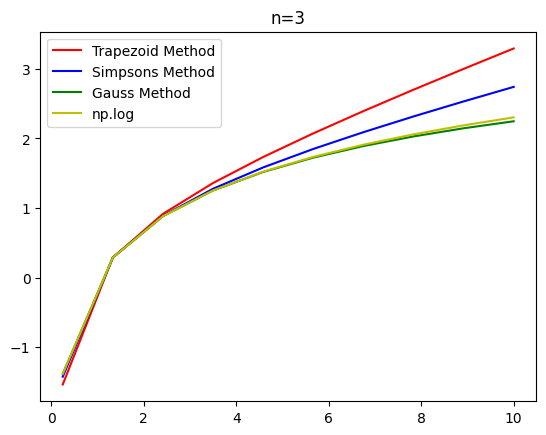

In [11]:
plt.plot(points, t, color='r', label='Trapezoid Method')
plt.plot(points, s, color='b', label='Simpsons Method')
plt.plot(points, g, color='g', label='Gauss Method')
plt.plot(points, np.log(points), color='y', label='np.log')
plt.title("n=3")
plt.legend()

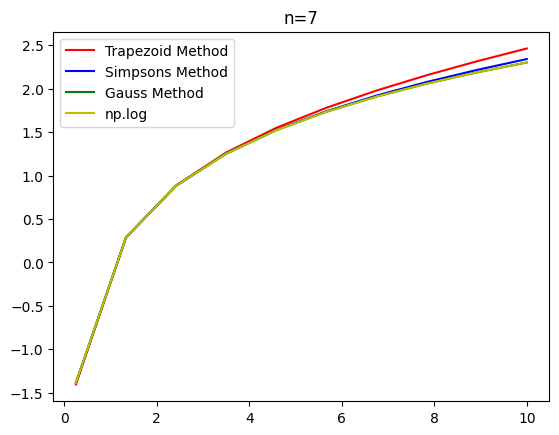

In [12]:
plt.plot(points, t1, color='r', label='Trapezoid Method')
plt.plot(points, s1, color='b', label='Simpsons Method')
plt.plot(points, g1, color='g', label='Gauss Method')
plt.plot(points, np.log(points), color='y', label='np.log')
plt.title("n=7")
plt.legend()

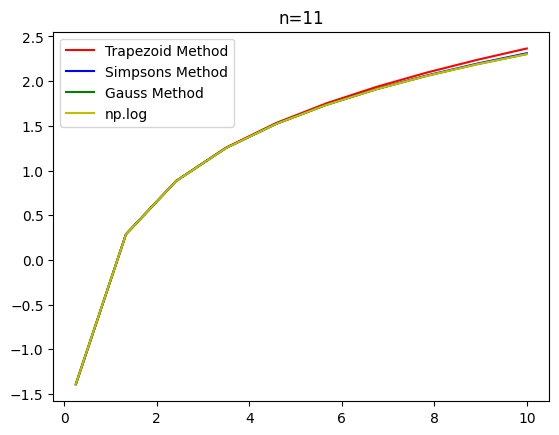

In [13]:
plt.plot(points, t2, color='r', label='Trapezoid Method')
plt.plot(points, s2, color='b', label='Simpsons Method')
plt.plot(points, g2, color='g', label='Gauss Method')
plt.plot(points, np.log(points), color='y', label='np.log')
plt.title("n=11")
plt.legend()

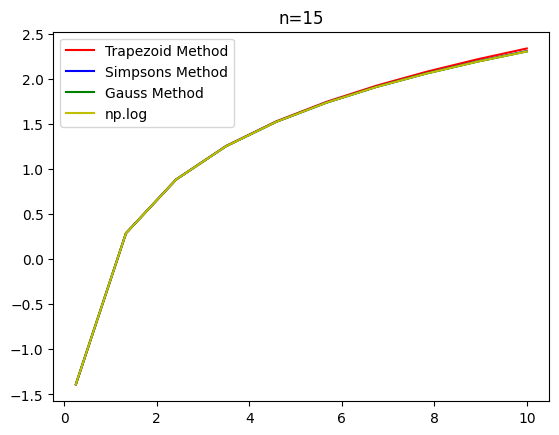

In [108]:
plt.plot(points, t3, color='r', label='Trapezoid Method')
plt.plot(points, s3, color='b', label='Simpsons Method')
plt.plot(points, g3, color='g', label='Gauss Method')
plt.plot(points, np.log(points), color='y', label='np.log')
plt.title("n=15")
plt.legend()

***
### Q.4 Let $\sigma(x,y) = (x,y,z=x^2+y^2),x\in [-1,1],y \in [-1,1]$ be the parametric representation of a paraboloid. The area of this surface is given by: $$\int_{-1}^1 \left(\int_{-1}^1 \sqrt{1+4x^2+4y^2}\ \ dx \right)\ \ dy. $$ Numerical estimate the area by estimating the double integral using Gaussian numerical integration method. Compare your estimate with the estimate obtained from the in-built numerical double integration from scipy by running the following code:
`f = lambda x, y: (1 + 4*(x ** 2 + y ** 2))**(0.5)
integrate.dblquad(f,-1,1,-1,1)`

In [14]:
### Estimate the double integral using Gaussian numerical integration, and compare
### with the numerical integration from scipy.

def paraboloid(x, y):
  return np.sqrt(1+ (4*(x**2) + (4*(y**2))))

n = 5
x, w = roots_legendre(n)

xi, yi = np.meshgrid(x, x)
A = paraboloid(xi, yi)
res = np.matmul(np.matmul(w, A), w)
print(res)

f = lambda x, y: (1 + 4*(x ** 2 + y ** 2))**(0.5) 
c, bound = integrate.dblquad(f,-1,1,-1,1)
print(c)


7.444365053913499
7.446256723012359


In [110]:
# The absolute difference between the in-built method and our estimate.
print(np.abs(c-res))

0.0018916690988604046
